<a href="https://colab.research.google.com/github/giovanni-ollari/esercitazioni/blob/main/countries_ofthe_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


In [3]:
df = pd.read_csv("countries_of_the_world.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          227 non-null    int64  
 1   Country                             227 non-null    object 
 2   Region                              227 non-null    object 
 3   Population                          227 non-null    int64  
 4   Area (sq. mi.)                      227 non-null    int64  
 5   Pop. Density (per sq. mi.)          227 non-null    float64
 6   Coastline (coast/area ratio)        227 non-null    float64
 7   Net migration                       224 non-null    float64
 8   Infant mortality (per 1000 births)  224 non-null    float64
 9   GDP ($ per capita)                  226 non-null    float64
 10  Literacy (%)                        209 non-null    float64
 11  Phones (per 1000)                   223 non-n

In [6]:
df = df.set_index('Country')

In [7]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Region', axis=1)

In [8]:
df= df.fillna(df.mean())

In [13]:
df.mean()

Population                            2.874028e+07
Area (sq. mi.)                        5.982270e+05
Pop. Density (per sq. mi.)            3.790471e+02
Coastline (coast/area ratio)          2.116533e+01
Net migration                         3.812500e-02
Infant mortality (per 1000 births)    3.550696e+01
GDP ($ per capita)                    9.689823e+03
Literacy (%)                          8.283828e+01
Phones (per 1000)                     2.360614e+02
Arable (%)                            1.379711e+01
Crops (%)                             4.564222e+00
Other (%)                             8.163831e+01
Climate                               2.139024e+00
Birthrate                             2.211473e+01
Deathrate                             9.241345e+00
Agriculture                           1.508443e-01
Industry                              2.827109e-01
Service                               5.652830e-01
dtype: float64

In [9]:
X= df.copy()

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02
mean,2.579924e-17,5.991292e-17,1.344984e-17,-1.858523e-17,-7.107017e-18,1.022188e-16,1.164022e-16,-6.631993e-16,1.662889e-17,-1.105332e-16,7.336275e-18,2.401408e-16,-1.171359e-16,-3.384468e-16,2.151974e-17,-3.338005e-17,-5.306573e-17,-6.071991e-16
std,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00
min,-2.442653e-01,-3.348897e-01,-2.288207e-01,-2.934434e-01,-4.339274e+00,-9.469807e-01,-9.185440e-01,-3.455644e+00,-1.046102e+00,-1.065089e+00,-5.495068e-01,-3.012900e+00,-1.717937e+00,-1.338237e+00,-1.408648e+00,-1.065812e+00,-1.975361e+00,-3.147691e+00
25%,-2.406047e-01,-3.322891e-01,-2.112236e-01,-2.920570e-01,-1.946193e-01,-7.780652e-01,-7.786108e-01,-3.410328e-01,-8.762324e-01,-8.041651e-01,-5.266319e-01,-6.020592e-01,-2.096840e-01,-8.476167e-01,-6.619051e-01,-7.831865e-01,-6.219151e-01,-7.616694e-01
50%,-2.036301e-01,-2.864116e-01,-1.812512e-01,-2.833225e-01,-7.867312e-03,-4.121528e-01,-4.087873e-01,3.952443e-01,-2.415496e-01,-2.522097e-01,-4.194809e-01,2.333622e-01,-2.096840e-01,-2.901958e-01,-2.171016e-01,-2.461977e-01,-5.345362e-03,0.000000e+00
75%,-9.557410e-02,-8.756252e-02,-1.140322e-01,-1.500168e-01,1.943613e-01,5.652764e-01,6.007311e-01,7.925161e-01,6.512643e-01,4.788417e-01,-8.561380e-04,8.476886e-01,2.722213e-01,6.910456e-01,2.712703e-01,4.250384e-01,3.931692e-01,6.643145e-01
max,1.092594e+01,9.223901e+00,9.593850e+00,1.177769e+01,4.750696e+00,4.438359e+00,4.538852e+00,9.090492e-01,3.546146e+00,3.729589e+00,5.552082e+00,1.145185e+00,2.806822e+00,2.583117e+00,4.153928e+00,4.367667e+00,4.686600e+00,2.431159e+00


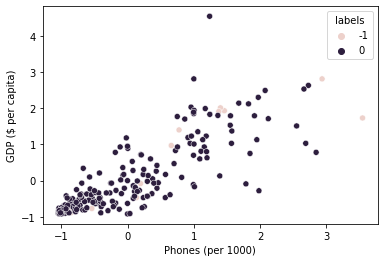

Punti identificati come rumore: 14


In [23]:
model = DBSCAN(eps=4, min_samples=36)
model.fit(X_scaled)
labels = model.labels_

labels = pd.Series(labels, index = X_scaled.index, name='labels')

labeled_df = X_scaled.join(labels)
sns.scatterplot(x=('Phones (per 1000)'), y=('GDP ($ per capita)'), data=labeled_df, hue='labels')
plt.show()

print('Punti identificati come rumore:', (labels==-1).sum())

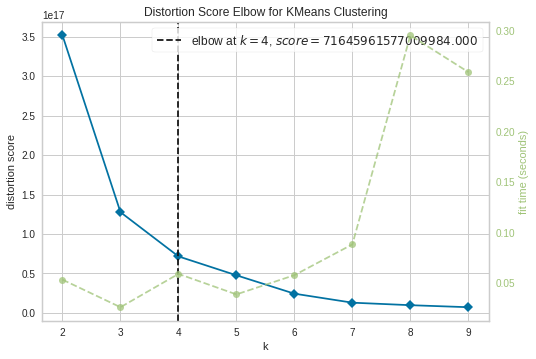

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()  
visualizer = KElbowVisualizer(model, k=range(2,10))
visualizer = visualizer.fit(X)
visualizer.show()